<a href="https://colab.research.google.com/github/thessafuzaro/Trabalho_Imagens/blob/main/Classificacao_Imagens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [159]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import cv2
import random
import zipfile
from sklearn.model_selection import train_test_split

In [160]:
#clonando os arquivos 
!git clone https://github.com/thessafuzaro/Trabalho_Imagens
%cd Trabalho_Imagens

Cloning into 'Trabalho_Imagens'...
remote: Enumerating objects: 58, done.
remote: Counting objects: 100% (58/58), done.
remote: Compressing objects: 100% (56/56), done.
remote: Total 58 (delta 25), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (58/58), done.
/content/Trabalho_Imagens/Trabalho_Imagens/Trabalho_Imagens/Trabalho_Imagens/Trabalho_Imagens/Trabalho_Imagens/Trabalho_Imagens/Trabalho_Imagens/Trabalho_Imagens/Trabalho_Imagens/Trabalho_Imagens/Trabalho_Imagens/Trabalho_Imagens/Trabalho_Imagens/Trabalho_Imagens/Trabalho_Imagens


In [161]:
#Salvando as imagens na variável x:
Folder =['Daisy.zip','Dandelion.zip','Rose.zip','Not_Flower.zip']   #lendo os arquivos zipados
Image_Name=[]
X_Gray=[]
X_Original=[]
for File in Folder:
  File_Name = zipfile.ZipFile(File, 'r')
  File_Name.extractall()   #extraindo os arquivos zip
  with zipfile.ZipFile(File, "r") as f:
      for Name in f.namelist():
          Image_Name.append(Name)

In [162]:
Y_Names = []
for yy in Image_Name:
  Name = yy[0]+yy[1]+yy[2]
  Y_Names.append(Name)

In [163]:
Unique_List = []    
for yy in Y_Names:
  if yy not in Unique_List:
    Unique_List.append(yy)

In [164]:
n = len(Unique_List)
Y = []
for yy in Y_Names:
  for i in range(n):
    if(yy == Unique_List[i]):
      Y.append(i)

In [165]:
DATASET_SIZE = len(Y_Names)
Ind = range(DATASET_SIZE)
Image_Size = 80
Num_Range = DATASET_SIZE

In [166]:
Ind_Train, Ind_Test= train_test_split(Ind,test_size=0.20, shuffle=True, random_state=3)

In [167]:
X_Train = []
Y_Train = []
for II in Ind_Train:
  Name = Image_Name[II]
  X_Train.append(cv2.resize(cv2.imread(Name),(Image_Size,Image_Size)))
  Y_Train.append(Y[II])

In [168]:
X_Test= []
Y_Test = []
for II in Ind_Test:
  Name = Image_Name[II]
  X_Test.append(cv2.resize(cv2.imread(Name),(Image_Size,Image_Size)))
  Y_Test.append(Y[II])

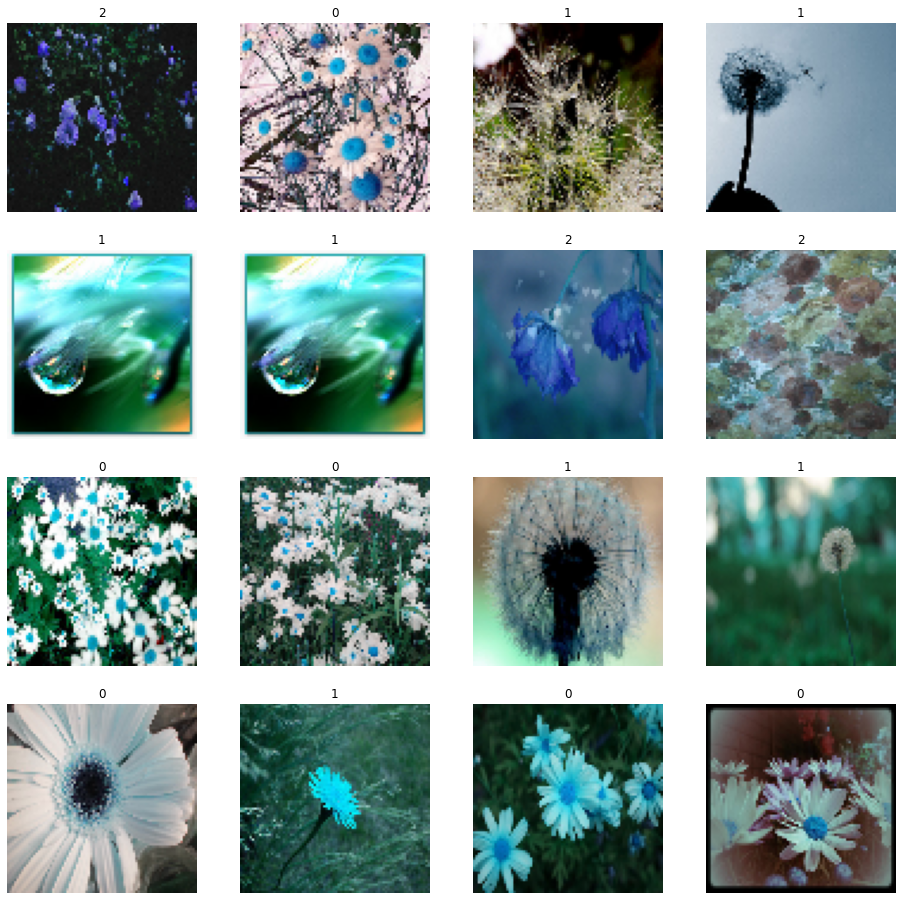

In [169]:
# Imagens de treino
Num,Cols,Dim = np.array(X_Train[0]).shape
plt.figure(figsize=(16, 16))
for i in range(16):
  ax = plt.subplot(4, 4, i + 1)
  kk = int(random.randrange(Num))
  plt.imshow(X_Train[kk])
  plt.title(Y_Train[kk])
  plt.axis("off")

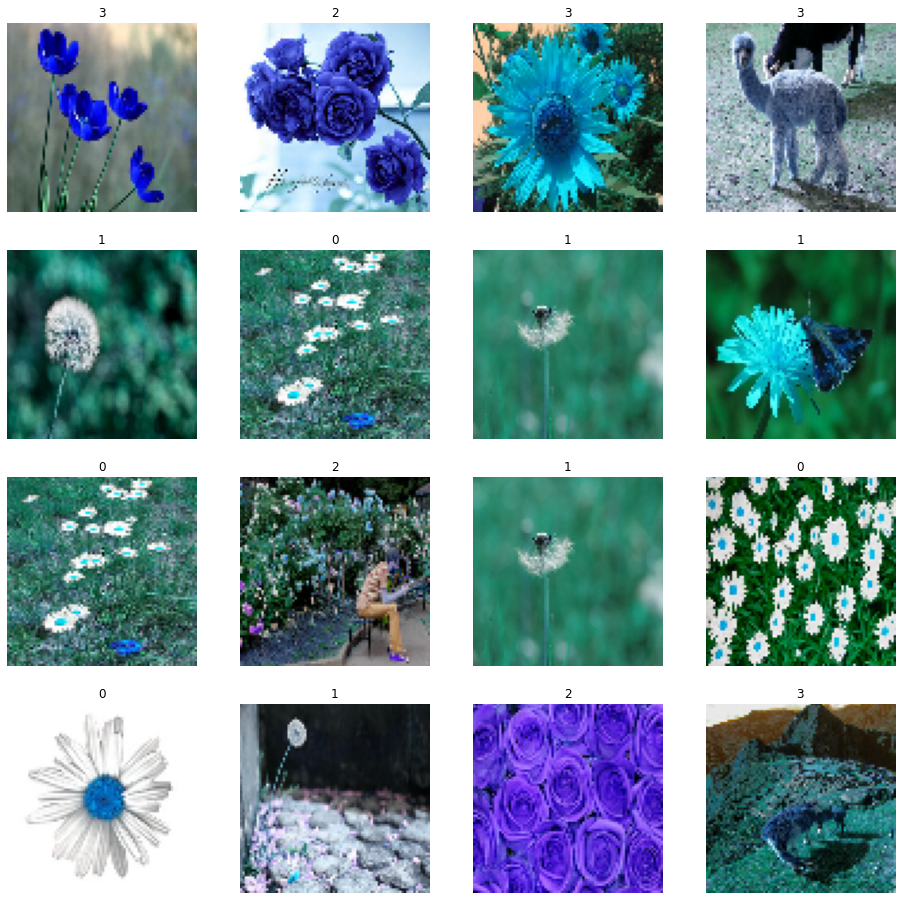

In [170]:
# Imagens de teste
Num,Cols,Dim = np.array(X_Test[0]).shape
plt.figure(figsize=(16, 16))
for i in range(16):
  ax = plt.subplot(4, 4, i + 1)
  kk = int(random.randrange(Num))
  plt.imshow(X_Test[kk])
  plt.title(Y_Test[kk])
  plt.axis("off")